In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os


import json
s = json.load( open(os.getenv ('PUI2015')+"/PUI2015_fbianco/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/Users/tianyigu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
dist_n = np.random.randn(1000)

print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_p = np.random.poisson(1, 1000)

print "poisson on normal", scipy.stats.kstest(dist_p,'norm')
print "poisson on normal", scipy.stats.anderson(dist_p, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold


normal on normal KstestResult(statistic=0.014341234910104639, pvalue=0.98627779352156653)
normal on normal AndersonResult(statistic=0.23184513465548662, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal KstestResult(statistic=0.5, pvalue=0.0)
poisson on normal AndersonResult(statistic=61.194931262813725, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.088]


The threshold is the critical value at significant value=0.01

# try writing down the null for each test and see if scipy manual agrees with you (the manual spells out the Null)

1) KS: H0: the two distributions are identical

2) KL: H0: categorical data has the given frequencies.
 
3) AD: H0: a sample is drawn from a population that follows a particular distribution


In [6]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)


then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) 
evaluated at the bin centers of the histogram from before

In [10]:
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])
print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "poisson on normal", scipy.stats.entropy(distpdf_p, scipy.stats.norm.pdf(bincenters_p)) 


normal on normal 0.00598612567538
poisson on normal 0.900880841241


#BINOMIAL

In [13]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

p=0.5
for i,n in enumerate(narray):
    p=0.1 
    dist = np.random.binomial(n, p, 1000)

 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

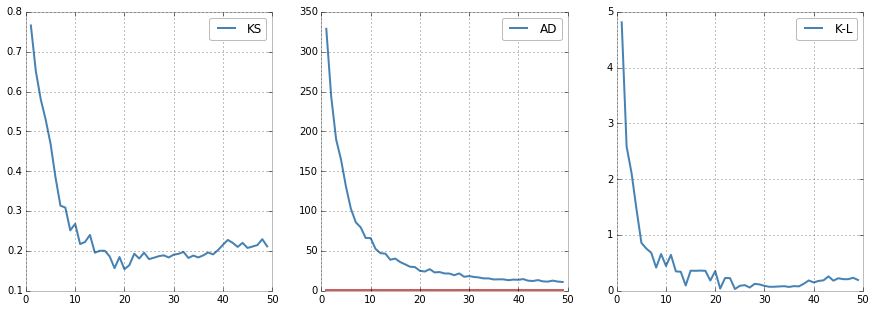

In [14]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

Caption:
    The three plots shows that the test resualt are decreasing with the mean of binomial increasing.

#POISSON

In [15]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

for i,n in enumerate(narray):
    p=0.1 
    dist = np.random.poisson(n, 1000)

    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

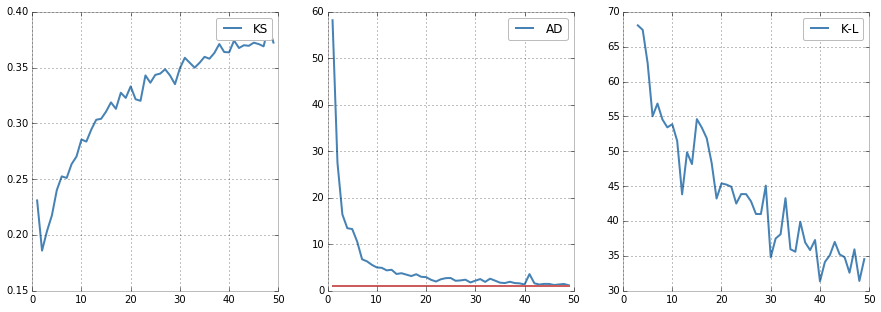

In [16]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

Caption:
    The test resault of KS is increasing while the binomial mean increase. The test resault of AD and KL is decreasing while the binomial mean increase.

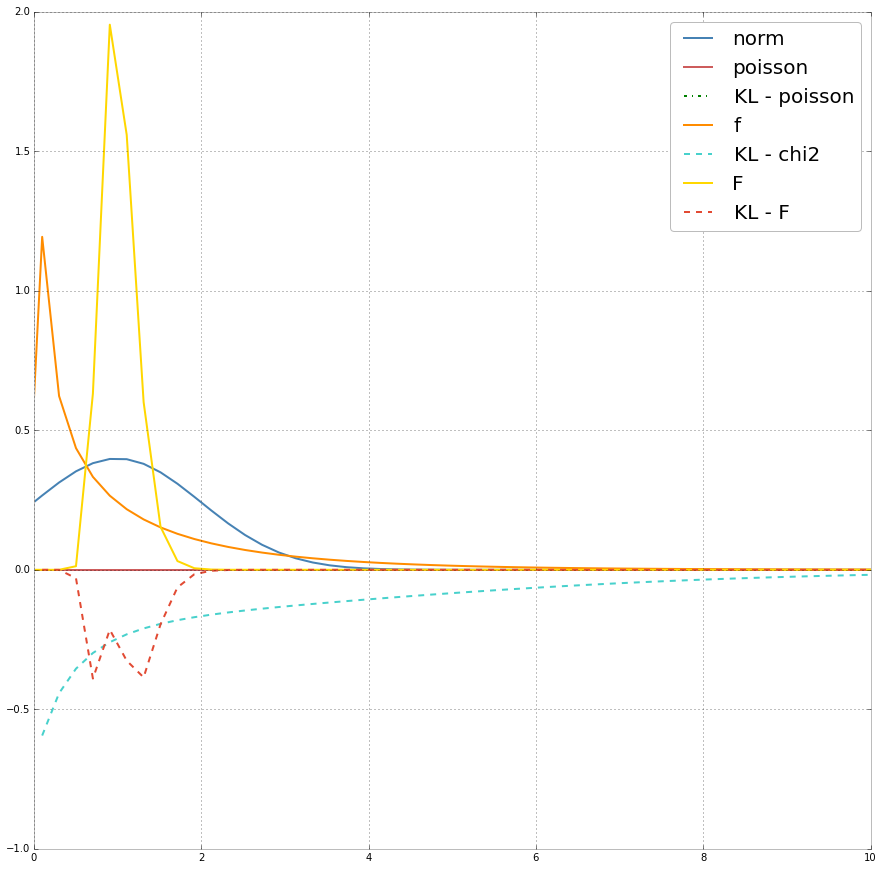

In [22]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')


pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')


pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)

The plot above is the probability density function of those distributions.